# Final Exam

## FINM 36700 - 2023

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

# Instructions

## Please note the following:

Points
* The exam is 155 points.
* You have 180 minutes to complete the exam.
* For every minute late you submit the exam, you will lose one point.


Submission
* You will upload your solution to the `Final Exam` assignment on Canvas, where you downloaded this. (Be sure to **submit** on Canvas, not just **save** on Canvas.
* Your submission should be readable, (the graders can understand your answers,) and it should **include all code used in your analysis in a file format that the code can be executed.** 

Rules
* The exam is open-material, closed-communication.
* You do not need to cite material from the course github repo--you are welcome to use the code posted there without citation.

Advice
* If you find any question to be unclear, state your interpretation and proceed. We will only answer questions of interpretation if there is a typo, error, etc.
* The exam will be graded for partial credit.

## Data

**All data files are found in the class github repo, in the `data` folder.**

This exam makes use of the following data files:
* `final_exam_data.xlsx`

This file has sheets for...
* `portfolio` (weekly) - Part 2
* `forecasting` (monthly) - Part 3
* `fx_carry`(daily) - Part 4

## Scoring

| Problem | Points |
|---------|--------|
| 1       | 40     |
| 2       | 25     |
| 3       | 50     |
| 4       | 40     |

### Each numbered question is worth 5 points unless otherwise specified.

### Notation
(Hidden LaTeX commands)

$$\newcommand{\betamkt}{\beta^{i,\text{MKT}}}$$
$$\newcommand{\betahml}{\beta^{i,\text{HML}}}$$
$$\newcommand{\betaumd}{\beta^{i,\text{UMD}}}$$
$$\newcommand{\Eri}{E\left[\tilde{r}^{i}\right]}$$
$$\newcommand{\Emkt}{E\left[\tilde{r}^{\text{MKT}}\right]}$$
$$\newcommand{\Ehml}{E\left[\tilde{r}^{\text{HML}}\right]}$$
$$\newcommand{\Eumd}{E\left[\tilde{r}^{\text{UMD}}\right]}$$

$$\newcommand{\frn}{\text{MXN}}$$
$$\newcommand{\frnrate}{\text{MXSTR}}$$
$$\newcommand{\FXspot}{S}$$
$$\newcommand{\fxspot}{\texttt{s}}$$
$$\newcommand{\rflogusd}{\texttt{r}^{\text{USD}}}$$
$$\newcommand{\rflogfrn}{\texttt{r}^{\frn}}$$

$$\newcommand{\wintt}{t,t+1}$$

$$\newcommand{\targ}{\text{USO}}$$

# 1. Short Answer

#### No Data Needed

These problems do not require any data file. Rather, analyze them conceptually. 

### 1.

Consider a Linear Factor Pricing Model (LFPM).

Which metric do we examine to understand its fit, (or errors)...
* given the estimated **time-series (TS)** test?
* given the estimated **cross-sectional (CS)** test?

**Given TS test**

You would want to see alphas being 0. In particular, R2s of the regressions are not relevant.

**Given CS test**

R2s are critical. One could also expect an alpha close to 0, if allowed.

### 2.

Consider the Arbitrage Pricing Theory (APT). Is it fair to say that it is more likely to work for sets of assets with low cross-correlation? Why or why not?

The Arbitrage Pricing Theory established that a perfect linear factor decomposition, with 0 correlation of errors and infinite assets, would also be a perfect pricing model.

(Why not)
However, low cross-correlation does not necessarily imply low correlation of errors. It may be the case the model is failing to identify systematic factors driving some of them.

### 3.

In constructing momentum portfolios, we discussed selecting the top and bottom 10% of stocks, ranked by past returns. How do you think the strategy would be impacted if we were more extreme in the selection, and went long-short just the top / bottom 1% of total stocks?

Selecting only 1% of total stocks would accentuate/stress momentum in the strategy, in the sense of expecting a higher mean return. However, selecting a smaller number of stocks also hurts diversification effects, which means a higher volatility would also be expected. In short, one would expect a higher mean returns and a higher volatility.

### 4.

Over longer horizons, do investments have higher Sharpe ratios? How is this issue relevant to long-term asset allocators such as Barnstable?

Expected mean returns scale linearly with time, while volatility scales linearly with the square-root of time. As the sharpe ratio is the mean divided by volatility, over longer horizons investments are expected to have higher sharpe ratios (scaling linearly with square-root of time).
Long-term asset allocators can benefit directly from this, being able to ride longer term horizons and expecting higher sharpe ratios, on average.

### 5.

Before it crashed, how did LTCM's performance compare to the S&P (SPY)? Was it an attractive investment? Be specific.

It was a very attractive investment! We saw that it achieved similar metrics from a mean and volatility perspective, but it did so with very little correlation with SPY. From a mean-variance optimization perspective, this is extremely valuable to a porfolio.

### 6.

Suppose investors are **not** mean-variance investors. If we find an investment with a Sharpe ratio higher than the "market", would this would be inconsistent with the CAPM?

The CAPM expresses that all investments have EXPECTED returns proportional to their market beta. The question seems to imply that a sharpe ratio would be OBSERVED to be higher. Consequenlty, this would not be inconsistent with CAPM, as it would not necessarily imply anything about expected returns. It would only say that some investment performed better over some period of time.

### 7.

What causes us concern about the performance of classic mean-variance optimization out-of-sample?

What is one of the potential solutions we discussed?

One of the main issues with mean-variance optimization is that it is overly sensitive to variations on mean return values, which are very hard to estimate precisely. The classic approach would not have a means to convey the uncertainty in point estimates for mean returns, and the optimization would consequently tend to take extreme positions based on highly uncertain figures. The high sensitivity stems from the explosiveness of inverting the covariance matrix.

One of the potential solutions dicussed was using regulatization to avoid extreme weights. Alternatively, one could specify constraints to weights directly.

### 8.

True or False: Uncovered Interest Parity implies Covered Interest Parity, but not vice-versa.

Explain.

False. Uncovered interest parity is a model about EXPECTATIONS. Covered interest parity is a NO-ARBITRAGE RELATIONSHIP between relative differences in risk-free rates, and spot and forward exchange rates. UIP does not imply CIP. UIP is a theory, while CIP is a no-arbitrage condition.

***

## Importing functions and modules

In [1]:
import pandas as pd
import numpy as np
from sympy import Matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew, kurtosis, norm
import seaborn as sns
import matplotlib.pyplot as plt


def calculate_statistics(df, annualize_factor=12, VaR=0.05, CVaR=0.05, dropdown=False):
    '''
    Calculates the mean, volatility, sharpe, skewness, kurtosis, VaR, CVaR and dropdown stats of a dataframe
    Returns a dataframe with values for each asset
    '''
    res={}
    res_i={}
    for i in df.columns:
        if df[i].dtype=='<M8[ns]':
            Dates=df[i]
        else:
            res_i.update({'mean':np.mean(df[i])*annualize_factor})
            res_i.update({'volatility':np.std(df[i])*(annualize_factor**(1/2))})
            res_i.update({'sharpe':res_i['mean']/res_i['volatility']})
            res_i.update({'skewness':skew(df[i])})
            res_i.update({'kurtosis':kurtosis(df[i])})
            res_i.update({'VaR':df[i].quantile(VaR)})
            res_i.update({'CVaR':df[i][df[i]<df[i].quantile(CVaR)].mean()})
            if dropdown:
                res_i.update({'Max_Drawdown':maxDrawD(Dates,df[i])})
            res.update({i:res_i})
            res_i={}
    return pd.DataFrame(res)

def calculate_statistics_array(data, annualize_factor=12, VaR=0.05, CVaR=0.05):
    '''
    Calculates the mean, volatility and sharpe ratio of an array
    Returns a dictionary with the 'mean', 'volatility' and 'sharpe' ratio of the array
    '''
    res_i={}
    res_i.update({'mean':np.mean(data)*annualize_factor})
    res_i.update({'volatility':np.std(data)*(annualize_factor**(1/2))})
    res_i.update({'sharpe':res_i['mean']/res_i['volatility']})
    res_i.update({'skewness':skew(data)})
    res_i.update({'kurtosis':kurtosis(data)})
    df=pd.DataFrame(data)
    res_i.update({'VaR':df.quantile(VaR).iloc[0]})
    res_i.update({'CVaR':df[df<df.quantile(CVaR)].mean().iloc[0]})
    # res_i.update({'Max_Drawdown':maxDrawD(df[i])})
    return res_i

def maxDrawD(dates, values):
    """
    Calculates the maximum drawdown and the dates of the max/min/recovery within the max drawdown period.
    
    Parameters:
    dates (array): An array of dates
    values (array): An array of values
    
    Returns:
    tuple: A tuple containing the maximum drawdown, the start date of the max drawdown period, 
    the end date of the max drawdown period, the date of the minimum value, and the date of recovery.
    """
    df = pd.DataFrame({'Date': dates, 'Value': values})
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    dates = df['Date'].values
    values = df['Value'].values

    wealth_index = 1000 * (1 + df['Value']).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks

    prev_max=previous_peaks[:drawdowns.idxmin()].idxmax()
    recovery_wealth=wealth_index[drawdowns.idxmin():]
    try:
        recovery_date=df['Date'].loc[recovery_wealth[recovery_wealth>=previous_peaks[prev_max]].index[0]]
    except:
        recovery_date=np.nan

    res={}
    res.update({'max_drawdown': drawdowns.min()})
    res.update({'max_drawdown_start_date':df['Date'].loc[previous_peaks[:drawdowns.idxmin()].idxmax()]})
    res.update({'max_drawdown_min_date':df['Date'].loc[drawdowns.idxmin()]})
    res.update({'max_recovery_date':recovery_date})
    
    return res


def tangency_portfolio(df):
    '''
    Calculates the weights of the tangency portfolio
    Inputs: dataframe with column 0 being the date and the rest ([1:]) being the assets
    Make sure df's first column (0) is the date, or anything that is not an asset
    '''
    stats=calculate_statistics(df)
    assets=len(df.columns[1:])
    mdf=Matrix(df.iloc[:,1:].cov())
    vect1=Matrix([1]*assets)
    mean=[]
    for i in stats:
        mean.append(stats[i]['mean'])
    vectmean=Matrix(mean)
    sigma_inv=mdf.inv()
    wt=(1/((vect1.T@sigma_inv@vectmean)[0,0]))*(sigma_inv@vectmean)

    tickers=[]
    for i in stats:
        tickers.append(i)
    tan_port=pd.DataFrame()
    tan_port['tickers']=tickers
    tan_port['Tangent Weights']=0.0
    for i in range(len(tan_port)):
        tan_port.loc[i,'Tangent Weights']=float(round(wt[i], 6))
    
    tan_port.set_index('tickers', inplace=True,drop=True)

    return tan_port
    

def correlation_heatmap(df):
    '''
    Plots a heatmap of the correlation matrix of a dataframe [1:]
    '''
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(df.iloc[:,1:].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

def calculate_market_statistics(df,regressor, annualize_factor=12):
    '''
    Calculates the alpha, beta, treynor ratio and information ratio of a dataframe for all non-date columns
    Regressor is benchmark: e.g., SPY, Market
    '''
    res={}
    res_i={}
    for i in df.columns:
        if df[i].dtype=='<M8[ns]':
            pass
        else:
            model=LinearRegression()
            model.fit(np.array(regressor).reshape(-1,1),df[i])
            alpha=model.intercept_*annualize_factor
            beta=model.coef_[0]
            res_i.update({'alpha':alpha})
            res_i.update({'market_beta':beta})
            res_i.update({'treynor_ratio':np.mean(df[i])*annualize_factor/beta})

            residuals=np.array(df[i])-model.predict(np.array(regressor).reshape(-1,1))
            res_i.update({'information_ratio':alpha/(np.std(residuals)*annualize_factor**(1/2))})
            res_i.update({'r2':model.score(np.array(regressor).reshape(-1,1), df[i])})

            res.update({i:res_i})
            res_i={}
    return pd.DataFrame(res).transpose()

def run_regression(df,regressors,annualize_factor=12):
    '''
    Runs a regression for all non-date columns in a dataframe
    Regressors is a dataframe with the regressors as columns
    Returns a dataframe with the alpha, betas, and r2 for each asset
    '''
    res={}
    res_i={}
    for i in df.columns:
        if df[i].dtype=='<M8[ns]':
            pass
        else:
            model=LinearRegression()
            model.fit(regressors,df[i])
            alpha=model.intercept_*annualize_factor
            betas=model.coef_
            r2=model.score(regressors, df[i])
            res_i.update({'alpha':alpha})
            for ii in range(len(betas)):
                res_i.update({'beta_'+str(regressors.columns[ii]):betas[ii]})
            res_i.update({'r2':r2})
            res.update({i:res_i})
            res_i={}
    
    return pd.DataFrame(res).transpose()

def prob(mu, sigma, h):
    '''
    Returns the probability of underperforming mu
    over a period h. Make sure that mu and sigma are 
    from log returns.
    '''
    return norm.cdf(np.sqrt(h)*-mu/sigma)

# 2. Optimization

Use the data found in the `portfolio` tab. it is weekly data.

### 1.

Assume the provided data is in terms of **excess** returns.

Report the weights of the tangency portfolio.

Report the weights of the MV portfolio which achieves a mean weekly return of `0.0025`.

In [2]:
pordf=pd.read_excel('../data/final_exam_data.xlsx',sheet_name='portfolio')

In [3]:
wt=tangency_portfolio(pordf)
tan_returns=pordf.iloc[:,1:].mean()@wt
target_weights=wt*0.0025/tan_returns

print('Weights that achieve a 0.0025 return:')
target_weights

Weights that achieve a 0.0025 return:


,Tangent Weights
tickers,
SPY,0.479969
BTC,0.079311
USO,-0.024121
TLT,-0.022660
IEF,0.093716
IYR,-0.246719
GLD,0.200172


### 2.

Assume the provided data is in terms of **total** returns.

Report the weights of the GMV portfolio

Report the weights of the MV portfolio which achieves a mean weekly return of `0.0025`.

In [4]:
def tangency_portfolio_rfr(asset_return,cov_matrix, cov_diagnolize = False):
    """ 
        Returns the tangency portfolio weights in a (1 x n) vector
        Inputs: 
            asset_return - return for each asset (n x 1) Vector
            cov_matrix = nxn covariance matrix for the assets
    """
    if cov_diagnolize:
        asset_cov = np.diag(np.diag(cov_matrix))
    else:
        asset_cov = np.array(cov_matrix)
    inverted_cov= np.linalg.inv(asset_cov)
    one_vector = np.ones(len(cov_matrix.index))
    
    den = (one_vector @ inverted_cov) @ (asset_return)
    num =  inverted_cov @ asset_return
    return (1/den) * num

def gmv_portfolio(asset_return,cov_matrix):
    """ 
        Returns the Global Minimum Variance portfolio weights in a (1 x n) vector
        Inputs: 
            asset_return - return for each asset (n x 1) Vector
            cov_matrix = nxn covariance matrix for the assets
    """
    asset_cov = np.array(cov_matrix)
    inverted_cov= np.linalg.inv(asset_cov)
    one_vector = np.ones(len(cov_matrix.index))
    
    den = (one_vector @ inverted_cov) @ (one_vector)
    num =  inverted_cov @ one_vector
    return (1/den) * num

def mv_portfolio(asset_return,cov_matrix,target_ret):
    """ 
        Returns the Mean-Variance portfolio weights in a (1 x n) vector when no riskless assset is available
        Inputs: 
            asset_return - total return for each asset (n x 1) Vector
            cov_matrix = nxn covariance matrix for the assets
            target_ret = Target Return (Not-Annualized)
            tangency_port = Tangency portfolio
    """
    omega_tan = tangency_portfolio_rfr(asset_return.mean(),cov_matrix)
    omega_gmv = gmv_portfolio(asset_return,cov_matrix) 
    
    mu_tan = asset_return.mean() @ omega_tan
    mu_gmv = asset_return.mean() @ omega_gmv
    
    delta = (target_ret - mu_gmv)/(mu_tan - mu_gmv)
    mv_weights = delta * omega_tan + (1-delta)*omega_gmv
    return mv_weights

temp_df=pordf.copy()
temp_df.set_index('date', inplace=True, drop=True)

In [5]:
tgmv_weights=mv_portfolio(temp_df, temp_df.cov(), 0.0025)
tgmv_df=target_weights.copy()
tgmv_df['Tangent Weights']=tgmv_weights
print('Weights that achieve a 0.0025 return:')
tgmv_df

Weights that achieve a 0.0025 return:


,Tangent Weights
tickers,
SPY,0.498982
BTC,0.074852
USO,-0.021620
TLT,-0.244953
IEF,0.757509
IYR,-0.253592
GLD,0.188823


### 3.

Conceptually, what is the difference between the portfolios in part 1 and part 2?

Mathematically, what is the difference in their optimizations?

Conceptually, in the excess returns approach, one only needs combinations of the risk-free rate and the tancency portfolio, as anything other than the tangency portfolio would, by definition, have a lower sharpe ratio (be not optimal).

Mathematically ,in the excess returns approach the weights to not need to add up to one! One can short or long as much as desired the risk-free asset, which has 0 correlation with any other asset. The excess return optimization has one fewer constraint (sum of weights equal to one is not present).

### 4.

#### (10pts)

Consider the following:
* drop `BTC` from the sample
* target a weekly mean return of `.0025`.
* assume once again that the provided data is **excess** returns.

Using data only through 2021, 
* calculate the tangency weights
* compute the performance of this tangency portfolio in the out-of-sample (OOS) period of 2022-2023.

Report the
* mean
* vol
* Sharpe

Compare these three metrics with the equally-weighted portfolio for 2022-2023.

In [6]:
tdf=pordf.copy()
tdf.drop(columns='BTC', inplace=True)
tdf=tdf[tdf['date']<'2022']
wt_4=tangency_portfolio(tdf)
tan_returns_4=tdf.iloc[:,1:].mean()@wt_4
target_weights_4=wt_4*0.0025/tan_returns_4

ttdf=pordf.copy()
ttdf.drop(columns='BTC', inplace=True)
ttdf=ttdf[ttdf['date']>='2022']
for i in ttdf.columns[1:]:
    ttdf[i]=ttdf[i]*target_weights_4.loc[i][0]

ttdf['MV_optimization']=ttdf.iloc[:,1:].sum(axis=1)

tttdf=pordf.copy()
tttdf.drop(columns='BTC', inplace=True)
tttdf=tttdf[tttdf['date']>='2022']
for i in tttdf.columns[1:]:
    tttdf[i]=tttdf[i]/len(tttdf.columns[1:])

ttdf['Equally_weighted']=tttdf.iloc[:,1:].sum(axis=1)

In [7]:
print('Annualized statistics:')
calculate_statistics(ttdf[['date','MV_optimization','Equally_weighted']],252).iloc[:3,:]

Annualized statistics:


,MV_optimization,Equally_weighted
mean,-0.341311,-0.121861
volatility,0.357731,0.276171
sharpe,-0.954100,-0.441252


**Annualized!!!**

***

# 3.

Forecast (total) returns on gold as tracked by the ETF ticker, $\targ$. This ETF holds crude oil.

As signals, use two interest rate signals, as seen in Treasury-notes. (No need to consider anything specific about Treasury notes, just read these as macroeconomic signals.)
* Tnote rate
* month-over-month change in the Tnote rate

Find the all data needed for this problem in the sheet `forecasting`.

In [8]:
forecasting=pd.read_excel('../data/final_exam_data.xlsx',sheet_name='forecasting')

In [9]:
forecasting

,date,USO,Tnote rate,Tnote rate change
0,2009-05-31,0.271394,3.465,0.341
1,2009-06-30,0.042033,3.523,0.058
2,2009-07-31,-0.029528,3.501,-0.022
3,2009-08-31,-0.020647,3.401,-0.100
4,2009-09-30,0.003883,3.307,-0.094
...,...,...,...,...
170,2023-07-31,0.151377,3.959,0.140
171,2023-08-31,0.025830,4.093,0.134
172,2023-09-30,0.077272,4.573,0.480
173,2023-10-31,-0.072224,4.875,0.302


### 1.

Estimate a forecasting regression of $\targ$ on the two (lagged) signals.

$$r_{t+1}^\targ = \alpha + \beta^{x}x_t + \beta^z z_t + \epsilon_{t+1}$$

where
* $x$ denotes the interest-rate signal.
* $z$ denotes the change in rate signal.

Report the r-squared, as well as the OLS estimates for the intercept and the two betas. (No need to annualize the stats.)

In [10]:
model=LinearRegression()
model.fit(forecasting[['Tnote rate','Tnote rate change']].shift(1).dropna(),forecasting['USO'].iloc[1:])
r2=model.score(forecasting[['Tnote rate','Tnote rate change']].shift(1).dropna(),forecasting['USO'].iloc[1:])
print('R2 score:',r2)
print('Intercept:',model.intercept_)
print('Tnote beta:',model.coef_[0])
print('Tnote change beta:',model.coef_[1])

R2 score: 0.02813716766965546
Intercept: 0.020120399914827315
Tnote beta: -0.009568836780175635
Tnote change beta: 0.07406127227052074


### 2.

Use your forecasted returns, $\hat{r}^{\targ}_{t+1}$ to build trading weights:

$$w_t = 0.50 + 50\;\hat{r}^{\targ}_{t+1}$$

(So the rule says to hold 50% in the ETF plus/minus 50x the forecast. Recall the forecast is a monthly percentage, so it is a small number.)

Calculate the return from implementing this strategy. Denote this as $r^x_t$.

Report the first and last 5 values.

In [11]:
wt=0.5+(50*model.predict(forecasting[['Tnote rate','Tnote rate change']].shift(1).dropna()))
forecast = forecasting[['date','USO']].iloc[1:,:].copy()
forecast['wt']=wt
forecast['forecast']=forecast['USO']*forecast['wt']

In [12]:
print('First 5 rows of the forecast:')
forecast[['date','forecast']].head()

First 5 rows of the forecast:


,date,forecast
1,2009-06-30,0.046697
2,2009-07-31,-0.001041
3,2009-08-31,0.005171
4,2009-09-30,-0.001909
5,2009-10-31,-0.036695


In [13]:
print('Last 5 rows of the forecast:')
forecast[['date','forecast']].tail()

Last 5 rows of the forecast:


,date,forecast
170,2023-07-31,0.053407
171,2023-08-31,0.003366
172,2023-09-30,0.003397
173,2023-10-31,-0.079126
174,2023-11-30,-0.009729


### 3.

Calculate the following (annualized) performance metrics for both the passive investment, $r^\targ$, as well as the strategy implemented in the previous problem, $r^x$.

* mean
* volatility
* max drawdown

In [14]:
tres=calculate_statistics(forecast[['date','USO','forecast']],12,0.05,0.05,True)
tres.loc['Max_Drawdown']=tres.loc['Max_Drawdown'].apply(lambda x: x['max_drawdown'])
tres.rename(columns={'USO':'Pasive','forecast':'Strategy'}, inplace=True)
tres.loc[['mean','volatility','Max_Drawdown'],:]

,Pasive,Strategy
mean,-0.022956,0.168447
volatility,0.35543,0.305718
Max_Drawdown,-0.947065,-0.653193


### 4.

#### (7pts)


Suppose we are assessing the returns to this active strategy, $r^x$, without knowing how it is generated. 

Use a regression (with an intercept) to report the optimal hedge ratio of passive $\targ$ to this active strategy. 

* Report the hedge ratio, being clear about whether you are going long or short $\targ$ in order to hedge.

* What is the mean return of the hedged active strategy?

In [15]:
model=LinearRegression()
model.fit(np.array(forecast['forecast']).reshape(-1,1),np.array(forecast['USO']).reshape(-1,1))
print('Optimal hedge ratio: ',-round(model.coef_[0][0],4))

Optimal hedge ratio:  -0.3182


The optimal hedge ratio would be to SHORT 0.3182 units of USO for each invested unit in the strategy

In [16]:
print('Mean return of hedged strategy (not annualized!):',round(np.mean(forecast['forecast']-model.coef_[0][0]*forecast['USO']),4))

Mean return of hedged strategy (not annualized!): 0.0146


### 5.

#### (8pts)

For the rest of the problem, consider the out-of-sample (OOS) performance of the strategy.

Forecast values of $\targ$ for January 2018 through Dec 2023. (So we are using the data up until January 2018 as “burn-in” data.)
* Loop through time, estimating the forecast only using data through time $t$.
* At each step, calculate the next OOS forecast, $\hat{r}^{\targ}_{t+1}$.

Report the first and last 5 values of your OOS forecast, $\hat{r}^{\targ}_{t+1}$.

In [17]:
dates=forecast['date'][forecast['date']>='2018']
df5=forecast.copy()
df5.drop(columns='wt', inplace=True)
df5['forecast']=np.nan
for i in dates:
    X=forecasting[forecasting['date']<i][['Tnote rate','Tnote rate change']].shift(1).dropna()
    y=forecasting[forecasting['date']<i]['USO'].iloc[1:]
    model=LinearRegression()
    model.fit(X,y)
    prediction=model.predict(np.array(forecasting[forecasting['date']<i].iloc[-1][['Tnote rate','Tnote rate change']]).reshape(1,-1))
    df5.loc[df5['date']==i,'forecast']=prediction

/Users/Daniel/opt/anaconda3/envs/UChicago1_macbook/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/Daniel/opt/anaconda3/envs/UChicago1_macbook/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/Daniel/opt/anaconda3/envs/UChicago1_macbook/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/Daniel/opt/anaconda3/envs/UChicago1_macbook/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/Daniel/opt/anaconda3/envs/UChicago1_macbook/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not

In [18]:
df5.dropna(inplace=True)
print('First 5 rows of the forecast:')
df5[['date','forecast']].head()

First 5 rows of the forecast:


,date,forecast
104,2018-01-31,-0.007559
105,2018-02-28,0.002248
106,2018-03-31,-0.005113
107,2018-04-30,-0.011960
108,2018-05-31,-0.002330


In [19]:
print('Last 5 rows of the forecast:')
df5[['date','forecast']].tail()

Last 5 rows of the forecast:


,date,forecast
170,2023-07-31,-0.006231
171,2023-08-31,-0.006372
172,2023-09-30,-0.007037
173,2023-10-31,0.019210
174,2023-11-30,-0.002345


### 6. 

#### (8pts)

Report the out-of-sample r-squared, relative to a baseline forecast which is simply the mean of $\targ$ up to the point the forecast is made.

Does the forecast seem effective?

In [20]:
temp=forecasting.copy()
temp['cum_mean_forecast']=temp['USO'].expanding().mean().shift(1)
df5=pd.merge(df5,temp[['date','cum_mean_forecast']],on='date')

In [21]:
RSS=np.sum((df5['USO']-df5['forecast'])**2)
TSS=np.sum((df5['USO']-df5['cum_mean_forecast'])**2)
print('R2 score:',1-RSS/TSS)

R2 score: -0.0044913307399883085


The forecast does not seems effective. The R2 is very low.

### 7. 

Report the correlation between 
* OOS forecast
* realized value of $\targ$.

In light of this, how effective does the forecast seem?

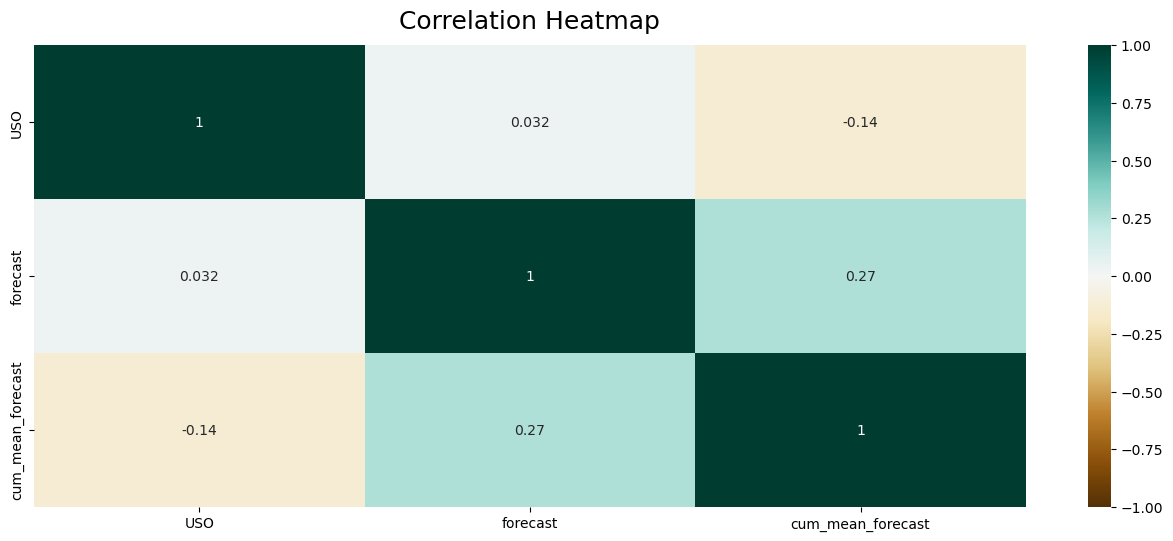

In [22]:
correlation_heatmap(df5)

In [23]:
print('Correlation between OOS forecast and realized value:',round(np.corrcoef(df5['USO'],df5['forecast'])[0][1],5))

Correlation between OOS forecast and realized value: 0.03192


The forecast does not seem very effective. The correlation is very low.

### 8.

#### (7pts)

Convert your OOS forecast to a traded return strategy, using the same allocation rule as in part 2.

Report the following performance stats for the OOS forecast strategy.

* mean
* volatility
* max-drawdown

Compare these with the passive return, $r^\targ$ over the same OOS window.

In [24]:
df5['wt_forecast']=0.5+(50*df5['forecast'])
df5['forecast_ret']=df5['USO']*df5['wt_forecast']
tdf5res=calculate_statistics(df5[['date','USO','forecast_ret']],12,0.05,0.05,True)
tdf5res.loc['Max_Drawdown']=tdf5res.loc['Max_Drawdown'].apply(lambda x: x['max_drawdown'])
tdf5res.rename(columns={'USO':'Pasive','forecast_ret':'Strategy'}, inplace=True)
tdf5res.loc[['mean','volatility','Max_Drawdown'],:]


,Pasive,Strategy
mean,0.074152,0.063566
volatility,0.446715,0.47567
Max_Drawdown,-0.846005,-0.818974


The pasive strategy seems to perform marginally better in mean and vol, although the max drawdown is a bit worse.

***

# 4. 

We examine FX carry for trading the Mexican peso $\frn$.
* Find the FX and risk-free rate data for this problem on sheet `fx_carry`. As before, these are spot FX prices quoted as USD per $\frn$.
* SOFR is the risk-free rate on USD, and $\frnrate$ is the risk-free rate for $\frn$.
* As in Homework 8, the data is provided such that any row’s date, $t$, is reporting $S_t$ and $r^f_{t,t+1}$.
That is, both of these are known at time t.

In [25]:
fx_daily=pd.read_excel('../data/final_exam_data.xlsx',sheet_name='fx_carry')

In [26]:
fx_daily

,date,MXN,SOFR,MXSTR
0,2018-04-03,0.054959,0.000073,0.000298
1,2018-04-04,0.054852,0.000069,0.000298
2,2018-04-05,0.055166,0.000069,0.000298
3,2018-04-06,0.054558,0.000069,0.000298
4,2018-04-09,0.054871,0.000069,0.000298
...,...,...,...,...
1375,2023-11-24,0.058392,0.000211,0.000446
1376,2023-11-27,0.058302,0.000211,0.000446
1377,2023-11-28,0.058418,0.000211,0.000446
1378,2023-11-29,0.058132,0.000211,0.000446


### 1.
#### (3pts)

Transform the data to **log** FX prices and **log** interest rates, just as we did in Homework 8.

$$\begin{align}
\fxspot_t & \equiv \ln\left(\FXspot_t\right)\\[3pt]
\rflogusd_{\wintt} & \equiv \ln\left(1+r^{\text{USD}}_{\wintt}\right)\\[3pt]
\rflogfrn_{\wintt} & \equiv \ln\left(1+r^{\frn}_{\wintt}\right)\\
\end{align}$$


Display the mean of all three series.

In [27]:
fx_daily['MXN']=np.log(fx_daily['MXN'])
fx_daily['SOFR']=np.log(fx_daily['SOFR']+1)
fx_daily['MXSTR']=np.log(fx_daily['MXSTR']+1)

In [28]:
fx_daily.mean()

date     2021-01-30 05:37:02.608695552
MXN                          -2.981326
SOFR                          0.000072
MXSTR                         0.000291
dtype: object

### 2.

Calculate the excess log return to a USD investor of holding $\frn$. Report the following **annualized** stats...
* Mean
* Volatility
* Sharpe ratio.

Assume there are 252 reported days per year for pursposes of annnualization.

In [29]:
ret=fx_daily['MXN'].diff()+fx_daily['MXSTR'].shift(1)-fx_daily['SOFR'].shift(1)
ret.dropna(inplace=True)
tstats=calculate_statistics_array(np.array(ret),252,0.05,0.05)
tstats

{'mean': 0.06670778753543484,
 'volatility': 0.1285773314793013,
 'sharpe': 0.5188145279416817,
 'skewness': -0.7713028838753212,
 'kurtosis': 6.28998142439964,
 'VaR': -0.013121091546541236,
 'CVaR': -0.020164640033356634}

### 3. 

Over the sample, was it better to be long or short $\frn$ relative to USD?
* Did the interest spread help on average?
* Did the USD appreciate or depreciate relative to $\frn$ over the sample?

The mean return for holding (long) MXN is positive over the the sample. Consequently, it would have been better to be long MXN relative to USD.

The interest spread helped the investor. The interest was higher for MXNSTR (compared to SOFR) for this period.

During the sample time, the USD depreciated relative to MXN. (Exchange rate increased)

### 4.

#### (7pts)

Forecast the growth of the FX rate using the interest-rate differential:

$$\fxspot_{t+1} - \fxspot_t = \alpha + \beta\left(\rflogusd_{\wintt} - \rflogfrn_{\wintt}\right) + \epsilon_{t+1}$$

Report the following OLS stats, (no need to annualize or scale them.)
* $\alpha$
* $\beta$
* r-squared

In [30]:
model=LinearRegression()
fx_daily.dropna(inplace=True)
model.fit(
    np.array((fx_daily['SOFR']-fx_daily['MXSTR']).shift(1).dropna()).reshape(-1,1),
    np.array(fx_daily['MXN'].diff().dropna()).reshape(-1,1)
    )
print('Intercept:',model.intercept_[0])
print('Beta:',model.coef_[0][0])
print('r-squared:',
      model.score(
          np.array((fx_daily['SOFR']-fx_daily['MXSTR']).shift(1).dropna()).reshape(-1,1),
          np.array(fx_daily['MXN'].diff().dropna()).reshape(-1,1)
        )
    )

Intercept: 0.001144918235607656
Beta: 5.081978852067023
r-squared: 0.00036316195963082


### 5. 

If we assume the Uncovered Interest Parity to hold true, what would you expect to be true of the regression estimates?

UIP states that the change in the spot fx rate would be completely explained by the changes in risk free rates. Consequently, one would expect beta to be one, and alpha to be 0. Given that UIP states a parity in EXPECTATION, we have no expectation for r-squared values.

### 6.

Based on the regression results, if we observe an increase in the interest rate on USD relative to $\frn$, should we expect the USD to get stronger (appreciate) or weaker (depreciate)?

A strengthening of the USD means that it now buys mode of the other currency that it did before. Alternatively, the foreign currency would decrease its value in USD. 

We obtained a positive beta. This means that the USD per MXN are expected to increase for increases in interest rates on USD relative to MXN. Equivalently, we would expect the **USD to weaken** with an increase in the interest rate on USD relative to MXN.

### 7.

If the risk free rates in $\frn$ increase relative to risk-free rates in USD, do we expect the forward exchange rate to be higher than the spot exchange rate?

CIP establishes that the forward-spot differencial in a foreign currency is equal to the differential in domestic - foreign risk-free rates. For an increase in relative risk-free rates  MXN relative to the USD (i.e. decrease of difference in domestic - foreign risk-free rates) we would expect a **lower forward exchange rate.**

### 8.

Do you think the estimated forecast impact of rates on currency returns would be larger over an annual horizon instead of a daily horizon? Why?

Forecasted impacts amplify/compound over time for signals that have a high autocorrelation. Risk-free rates are a prime example of a dynamic with high autocorrelation. Consequently, the estimated impact of rates (again, which are very likely to have substantial autocorrelation) on currency returns would be **larger over an annual horizon instead of a daily horizon.**

***